In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, recall_score, precision_score, f1_score, accuracy_score, classification_report

In [6]:
heart = pd.read_csv('heartFailure.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Separating categorical and numerica columns**

In [1]:
category_features = [col for col in heart.columns if heart[col].dropna().apply(lambda x: isinstance(x, str)).all()]
numeric_features = [col for col in heart.columns if heart[col].dropna().apply(lambda x: isinstance(x, (int, float))).all()]

NameError: name 'heart' is not defined

**Filling Missing Values with SimpleImputer**

In [9]:
cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='mean')
oneHot = OneHotEncoder()

In [10]:
fill = ColumnTransformer([('categorical_filling', cat_imputer, category_features),
                                ('numerical_filling', num_imputer, numeric_features)],
                               remainder='passthrough')
filled_value = fill.fit_transform(heart)

**Creating DataFrame out of filled values**

In [11]:
filled_df = pd.DataFrame(filled_value, columns=category_features+numeric_features).round(2)

**Making column appearance or order accoring to the original column patterns**

In [13]:
heart_df = filled_df[heart.columns]
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49.0,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37.0,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48.0,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54.0,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


**Splitting x and y value**

In [16]:
X = heart_df.drop(columns=['HeartDisease'])
y = heart_df.HeartDisease.astype(int)

**Category Transform: Changing string value to numeric values**

In [17]:
transformer = ColumnTransformer([('cat_conversion', oneHot, category_features)],
                                remainder = 'passthrough')
transformed_data = transformer.fit_transform(X)

In [18]:
# Skimming floating values to 2-decimal places
transformed_x = pd.DataFrame(transformed_data).map(lambda col: round(col, 2) if isinstance(col, (int, float)) else col)

In [19]:
transformed_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,40.0,140.0,289.0,0.0,172.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,49.0,160.0,180.0,0.0,156.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,37.0,130.0,283.0,0.0,98.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,48.0,138.0,214.0,0.0,108.0,1.5
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,54.0,150.0,195.0,0.0,122.0,0.0


**Splitting train and test data**

In [20]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

## Normalizing Data and ML Models that require normalization

**`LinearRegression, LogisticRegression, SVM, K-NearestNeighbors` require normalized data**

In [21]:
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.transform(X_test)

**1. `LogisticRegression`**

In [22]:
log_reg = LogisticRegression()
log_reg.fit(X_trains, y_train)
round(log_reg.score(X_tests, y_test), 3)*100

85.3

In [87]:
y_log_pred = log_reg.predict(X_tests)
y_log_pred_proba = log_reg.predict_proba(X_tests)
y_log_tpr = y_log_pred_proba[:, 1]

**2. `Support Vector Mechanism (SVM)`**

In [24]:
svm = SVC()
svm.fit(X_trains, y_train)
round(svm.score(X_tests, y_test), 3)*100

89.1

In [89]:
y_svm_pred = svm.predict(X_tests)

**3. `K-Nearest Neighbors (KNN)`**

In [26]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_trains, y_train)
round(knn.score(X_tests, y_test), 3)*100

85.9

In [91]:
y_knn_pred = knn.predict(X_tests)
y_knn_pred_proba = knn.predict_proba(X_tests)
y_knn_tpr = y_knn_pred_proba[:, 1]

**4. `Principal Component Analysis (PCA)`**
* PCA is used for dimensionality reduction (higher dimension data to lower)
* PCA is similar to StandardScaler(), but it changes the dimensions
* If we have 20 columns, using PCA, columns can be reduced to `n_components=n` number of dimensions

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(transformed_x)

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [30]:
#Splitting Data in training and testing sets
np.random.seed(42)
X_train_I, X_test_I, y_train_I, y_test_I = train_test_split(X_pca, y, test_size=0.2)

In [31]:
# Using ML model on training and testing sets
clf = LogisticRegression()
clf.fit(X_train_I, y_train_I)
round(clf.score(X_test_I, y_test_I), 2)*100

83.0

## ML models that do not require normalization

**1. Gradient Boosted Frameworks**
* `XGBClassifier`

In [35]:
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_clf.fit(X_train, y_train)
round(xgb_clf.score(X_test, y_test), 3)*100

89.1

In [98]:
y_xgb_pred = xgb_clf.predict(X_test)
y_xgb_pred_proba = xgb_clf.predict_proba(X_test)
y_xgb_tpr = y_xgb_pred_proba[:, 1]

* `LGBMClassifier`

In [99]:
lgbm_clf = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, verbose=-1)
lgbm_clf.fit(X_train, y_train)
round(lgbm_clf.score(X_test, y_test), 3)*100

88.6

In [100]:
y_lgbm_pred = lgbm_clf.predict(X_test)
y_lgbm_pred_proba = lgbm_clf.predict_proba(X_test)
y_lgbm_tpr = y_lgbm_pred_proba[:, 1]

* `CatBoostClassifier`

In [39]:
catboost_clf = CatBoostClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, verbose=0, random_state=42)
catboost_clf.fit(X_train, y_train)
round(catboost_clf.score(X_test, y_test), 3)*100

88.6

In [102]:
y_cat_pred = catboost_clf.predict(X_test)
y_cat_pred_proba = catboost_clf.predict_proba(X_test)
y_cat_tpr = y_cat_pred_proba[:, 1]

**2. `GradientBoostingClassifier`**

In [41]:
grad_clf = GradientBoostingClassifier(n_estimators=150, learning_rate=0.3, max_depth=3, random_state=42)
grad_clf.fit(X_train, y_train)
round(grad_clf.score(X_test, y_test), 3)*100

87.5

In [103]:
y_gradient_pred = grad_clf.predict(X_test)
y_gradient_pred_proba = grad_clf.predict_proba(X_test)
y_gradient_tpr = y_gradient_pred_proba[:, 1]

**3. `RandomForestClassifier`**

In [43]:
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
round(rand_clf.score(X_test, y_test), 3)*100

87.5

In [104]:
y_rand_pred = rand_clf.predict(X_test)
y_rand_pred_proba = rand_clf.predict_proba(X_test)
y_rand_tpr = y_rand_pred_proba[:, 1]

## Creating Dictionary out of all Machine Learning Models

**Creating Function for all kind of scores**

In [45]:
def model_evaluation(y_test, y_pred):
    print(f'AccuracyScor: {accuracy_score(y_test, y_pred):.3f}'),
    print(f'PrecisionScore: {precision_score(y_test, y_pred, average='weighted'):.3f}'),
    print(f'RecallScore: {recall_score(y_test, y_pred, average='weighted'):.3f}'),
    print(f'F1Score: {f1_score(y_test, y_pred, average='weighted'):.3f}')
    print('\n')
    
    metrics = {'AccuracyScore': accuracy_score(y_test, y_pred),
               'PrecisionScore': precision_score(y_test, y_pred, average='weighted'),
               'RecallScore': recall_score(y_test, y_pred, average='weighted'),
               'F1Score': f1_score(y_test, y_pred, average='micro')
              }
    return metrics

In [46]:
ml_models = {
    'LogisticRegression': model_evaluation(y_test, y_log_pred),
    'SupportVectorMechanism': model_evaluation(y_test, y_svm_pred),
    'K-NearestNeighbors': model_evaluation(y_test, y_knn_pred),
    'XGBClassifier': model_evaluation(y_test, y_xgb_pred),
    'LGBMClassifier': model_evaluation(y_test, y_lgbm_pred),
    'CatBoostClassifier': model_evaluation(y_test, y_cat_pred),
    'GradientBoostingClassifier': model_evaluation(y_test, y_gradient_pred),
    'RandomForestClassifier': model_evaluation(y_test, y_rand_pred)
}

AccuracyScor: 0.853
PrecisionScore: 0.857
RecallScore: 0.853
F1Score: 0.854


AccuracyScor: 0.891
PrecisionScore: 0.892
RecallScore: 0.891
F1Score: 0.891


AccuracyScor: 0.859
PrecisionScore: 0.863
RecallScore: 0.859
F1Score: 0.859


AccuracyScor: 0.891
PrecisionScore: 0.892
RecallScore: 0.891
F1Score: 0.891


AccuracyScor: 0.886
PrecisionScore: 0.888
RecallScore: 0.886
F1Score: 0.886


AccuracyScor: 0.886
PrecisionScore: 0.888
RecallScore: 0.886
F1Score: 0.886


AccuracyScor: 0.875
PrecisionScore: 0.879
RecallScore: 0.875
F1Score: 0.876


AccuracyScor: 0.875
PrecisionScore: 0.877
RecallScore: 0.875
F1Score: 0.875




In [47]:
model_df = pd.DataFrame.from_dict(ml_models, orient='index')

In [48]:
model_df

,AccuracyScore,PrecisionScore,RecallScore,F1Score
LogisticRegression,0.853261,0.857156,0.853261,0.853261
SupportVectorMechanism,0.891304,0.891886,0.891304,0.891304
K-NearestNeighbors,0.858696,0.863439,0.858696,0.858696
XGBClassifier,0.891304,0.891886,0.891304,0.891304
LGBMClassifier,0.885870,0.888046,0.885870,0.885870
CatBoostClassifier,0.885870,0.888046,0.885870,0.885870
GradientBoostingClassifier,0.875000,0.878750,0.875000,0.875000
RandomForestClassifier,0.875000,0.877242,0.875000,0.875000


<Axes: >

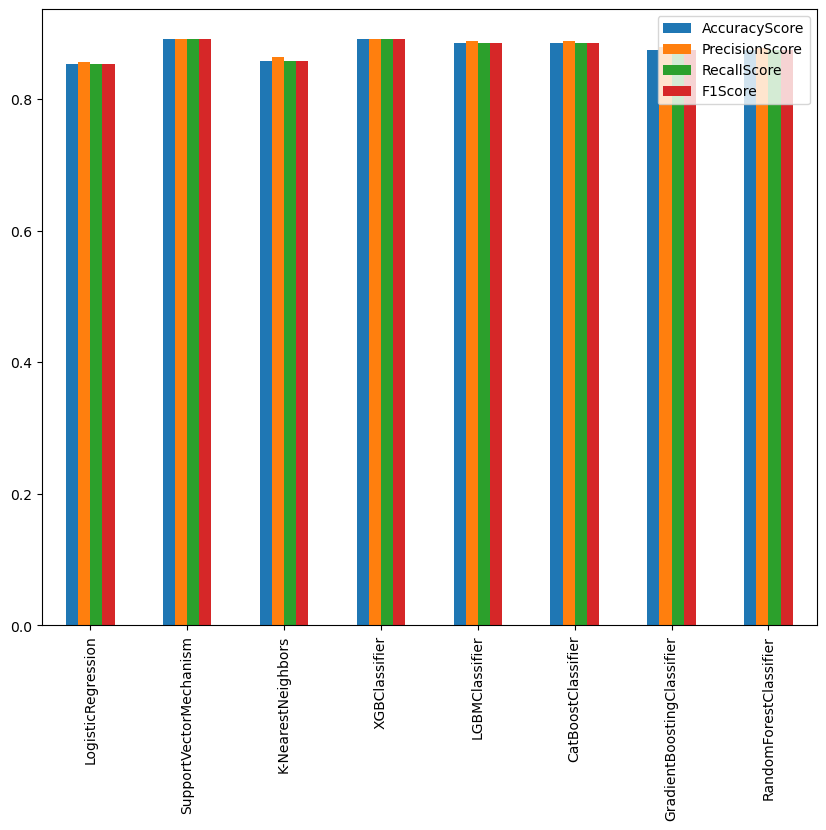

In [49]:
model_df.plot(kind='bar', figsize=(10,8))

In [50]:
models_long = model_df.reset_index().melt(id_vars='index', var_name='Metrics', value_name='Score')
models_long.rename(columns={'index':'Models'}, inplace=True)

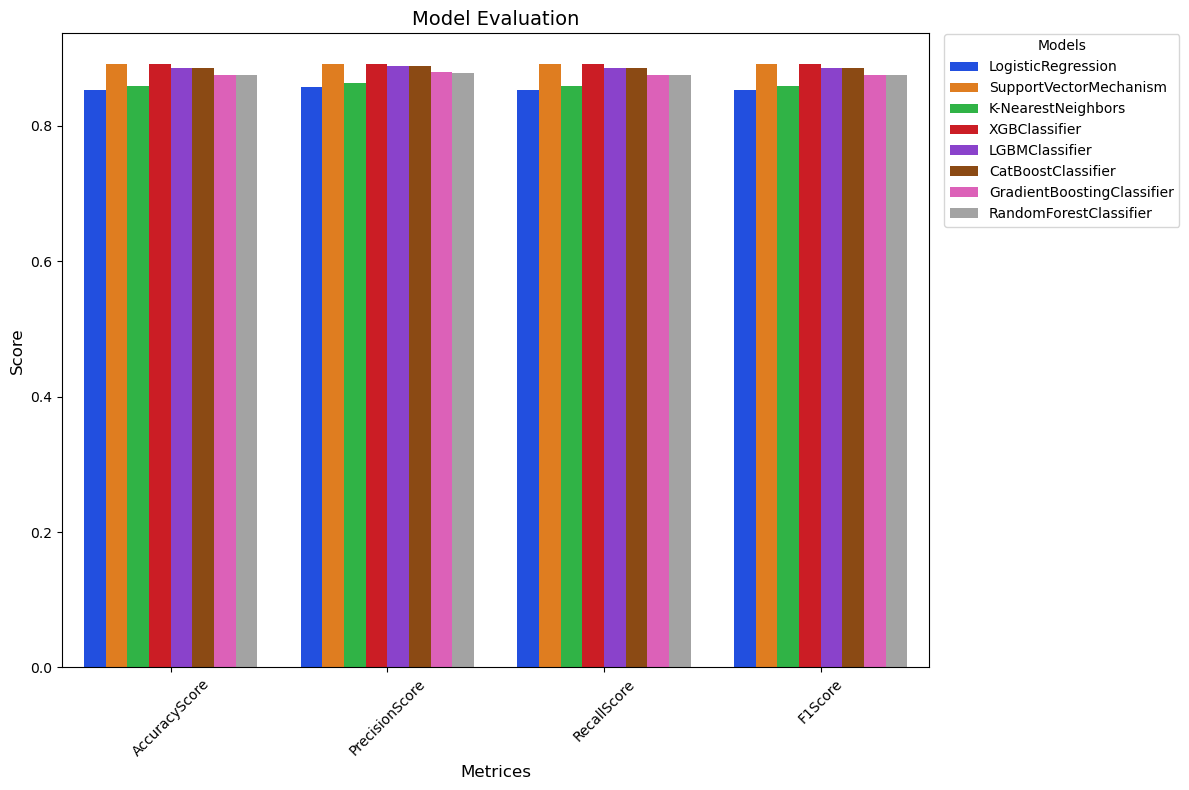

In [84]:
plt.figure(figsize=(12, 8))
sns.barplot(data=models_long, x='Metrics', y='Score', hue='Models', palette='bright')
plt.title('Model Evaluation', fontsize=14)
plt.xlabel('Metrices', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Models', fontsize=10, bbox_to_anchor = (1.01, 1.01))
plt.tight_layout()
plt.show();

## Cross Validation

In [168]:
x = transformed_x
y = heart_df.HeartDisease.astype(int)
x_scaled = scaler.fit_transform(x)

In [61]:
models_norm = [log_reg, svm, knn]
models_not_norm = [xgb_clf, lgbm_clf, catboost_clf, grad_clf, rand_clf]
score_list = ['accuracy', 'precision', 'recall', 'f1']
# For normalized data sets
results = {}
for mod in models_norm:
    model_name = mod.__class__.__name__
    results[model_name]= {}
    for metric in score_list:
        score = cross_val_score(estimator=mod, X=x_scaled, y=y, cv=5, scoring=metric).mean()
        results[model_name][metric] = score

for model, metrics in results.items():
    print(f'\n{model}: ')
    for metric, score in metrics.items():
        print(f'{metric}: {score:.3f}')

# For not normalized Datasets
result = {}
for mod in models_not_norm:
    model_name = mod.__class__.__name__
    result[model_name]={}
    for metric in score_list:
        score = cross_val_score(mod, x, y, cv=5, scoring=metric).mean()
        result[model_name][metric] = score
for model, metric in result.items():
    print(f'\n{model}')
    for metric, score in metric.items():
        print(f'{metric}: {score:.3f}')


LogisticRegression: 
accuracy: 0.827
precision: 0.853
recall: 0.840
f1: 0.842

SVC: 
accuracy: 0.823
precision: 0.842
recall: 0.850
f1: 0.841

KNeighborsClassifier: 
accuracy: 0.819
precision: 0.841
recall: 0.836
f1: 0.835

XGBClassifier
accuracy: 0.828
precision: 0.859
recall: 0.838
f1: 0.843

LGBMClassifier
accuracy: 0.820
precision: 0.852
recall: 0.831
f1: 0.835

CatBoostClassifier
accuracy: 0.827
precision: 0.854
recall: 0.838
f1: 0.841

GradientBoostingClassifier
accuracy: 0.818
precision: 0.848
recall: 0.828
f1: 0.832

RandomForestClassifier
accuracy: 0.822
precision: 0.850
recall: 0.858
f1: 0.846


In [76]:
df1 = pd.DataFrame.from_dict(results, orient='index')
df2 = pd.DataFrame.from_dict(result, orient='index')
df = pd.concat([df1, df2])
df

,accuracy,precision,recall,f1
LogisticRegression,0.826758,0.853316,0.840478,0.841668
SVC,0.823450,0.842292,0.850320,0.841142
KNeighborsClassifier,0.819102,0.841343,0.836478,0.835275
XGBClassifier,0.827798,0.859072,0.838400,0.842871
LGBMClassifier,0.820183,0.852197,0.830538,0.834756
CatBoostClassifier,0.826746,0.854141,0.838459,0.840728
GradientBoostingClassifier,0.817979,0.848328,0.828480,0.831741
RandomForestClassifier,0.822363,0.850429,0.858144,0.846145


* Making short DataFrame to long for seaborn plot

In [79]:
df_new = df.reset_index().melt(id_vars='index', var_name='Metrics', value_name='Score')
df_new.rename(columns={'index':'Models'}, inplace=True)
df_new

,Models,Metrics,Score
0,LogisticRegression,accuracy,0.826758
1,SVC,accuracy,0.823450
2,KNeighborsClassifier,accuracy,0.819102
3,XGBClassifier,accuracy,0.827798
4,LGBMClassifier,accuracy,0.820183
5,CatBoostClassifier,accuracy,0.826746
6,GradientBoostingClassifier,accuracy,0.817979
7,RandomForestClassifier,accuracy,0.822363
8,LogisticRegression,precision,0.853316
9,SVC,precision,0.842292


* Plotting `cross_val_score` sets

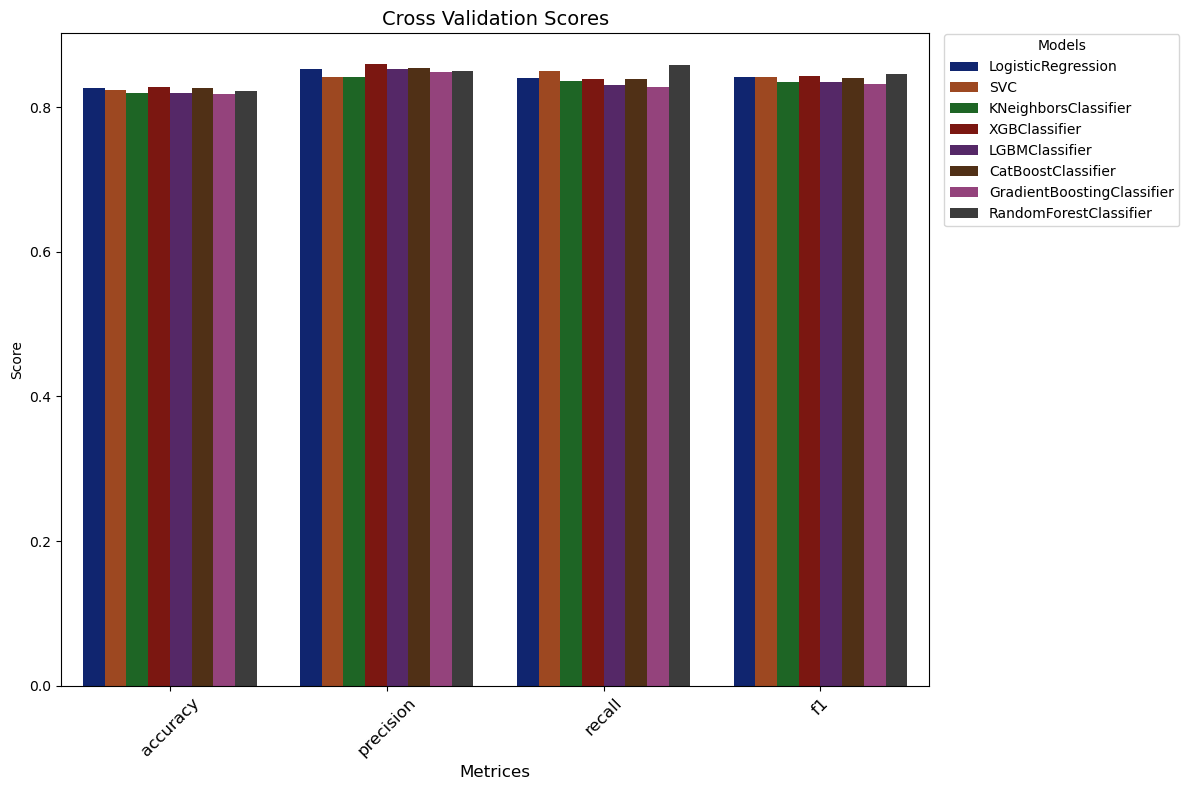

In [122]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_new, x='Metrics', y='Score', hue='Models', palette='dark')
plt.title('Cross Validation Scores', fontsize=14)
plt.xlabel('Metrices', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Models', bbox_to_anchor=(1.01, 1.01))
plt.tight_layout()
plt.show()

**ROC AUC Curve and ROC Score**

In [162]:
fpr, tpr, thresholds = roc_curve(y_test, y_log_tpr)

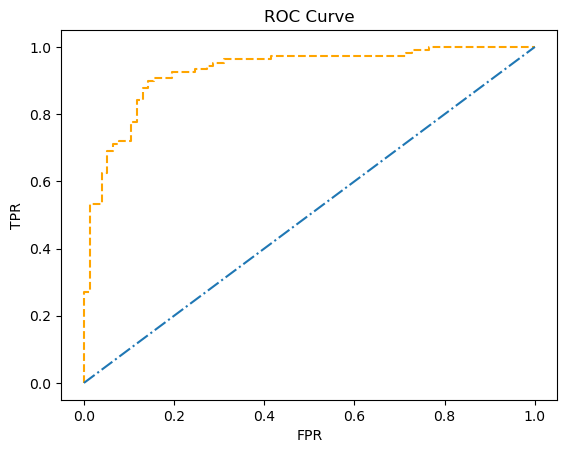

In [163]:
plt.plot(fpr, tpr, color='orange', ls='--', label='ROC Curve')
plt.plot([0,1], [0,1], ls='-.', label='Random Line')
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [118]:
round(roc_auc_score(y_test, y_log_tpr), 3)

0.927

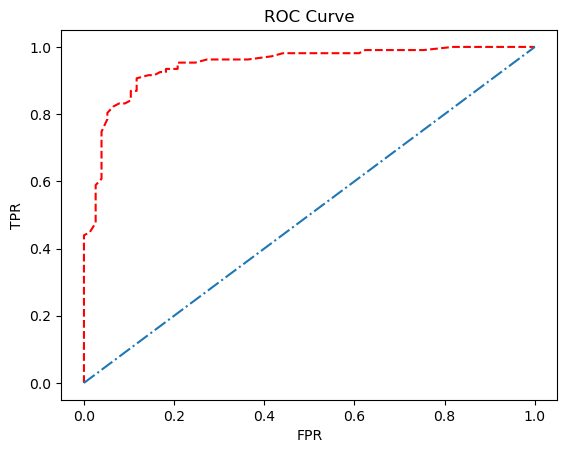

In [115]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_rand_tpr)
plt.plot(fpr1, tpr1, color='red', ls='--', label='ROC Curve')
plt.plot([0,1], [0,1], ls='-.', label='Random Line')
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [119]:
round(roc_auc_score(y_test, y_rand_tpr), 3)

0.946

**Confusion Matrix**

In [185]:
def display_confusion_matrix(model_name, y_test, y_pred):
    from sklearn.metrics import confusion_matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix for {model_name}: ')
    print(f'{confusion_mat}\n')

In [186]:
conf_mat = {
    'LogisticRegression': display_confusion_matrix('LogisticRegression', y_test, y_log_pred),
    'SVC': display_confusion_matrix('SVC', y_test, y_svm_pred),
    'KNeighboursClassifier': display_confusion_matrix('KNeighboursClassifier', y_test, y_svm_pred),
    'XGBClassifier': display_confusion_matrix('XGBClassifier', y_test, y_xgb_pred),
    'LGBMClassifier': display_confusion_matrix('LGBMClassifier', y_test, y_lgbm_pred),
    'CatBoostClassifier': display_confusion_matrix('CatBoostClassifier', y_test, y_cat_pred),
    'GradientBoostingClassifier': display_confusion_matrix('GradientBoostingClassifier', y_test, y_gradient_pred),
    'RandomForestClassifier': display_confusion_matrix('RandomForestClassifier', y_test, y_rand_pred)
}

Confusion Matrix for LogisticRegression: 
[[67 10]
 [17 90]]

Confusion Matrix for SVC: 
[[68  9]
 [11 96]]

Confusion Matrix for KNeighboursClassifier: 
[[68  9]
 [11 96]]

Confusion Matrix for XGBClassifier: 
[[68  9]
 [11 96]]

Confusion Matrix for LGBMClassifier: 
[[69  8]
 [13 94]]

Confusion Matrix for CatBoostClassifier: 
[[69  8]
 [13 94]]

Confusion Matrix for GradientBoostingClassifier: 
[[69  8]
 [15 92]]

Confusion Matrix for RandomForestClassifier: 
[[68  9]
 [14 93]]



In [157]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_rand_pred)

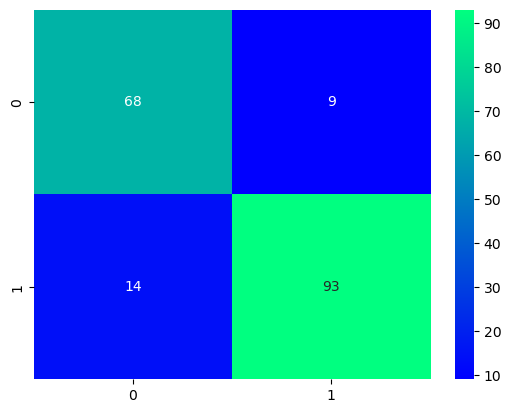

In [159]:
sns.heatmap(confusion_mat, annot=True, cmap='winter');

**Confusion Matrix using `crosstab()`**

In [167]:
pd.crosstab(y_test, y_rand_pred, rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,68,9
1,14,93


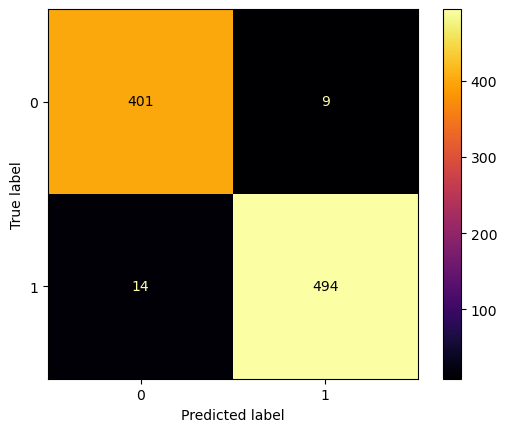

In [171]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rand_clf, x, y, cmap='inferno');

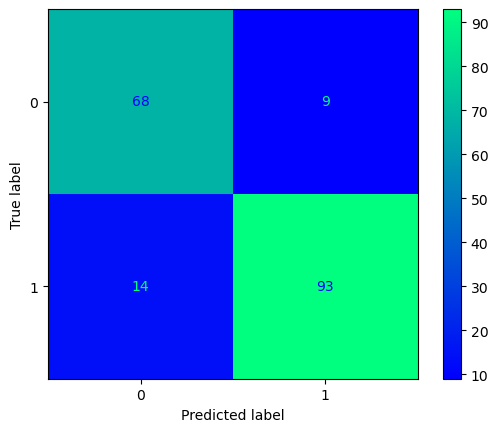

In [173]:
ConfusionMatrixDisplay.from_predictions(y_test, y_rand_pred, cmap='winter');

**Classification Report**

In [181]:
def display_class_report(model_name, y_test, y_pred):
    classi_report = classification_report(y_test, y_rand_pred)
    print(f'Classification Report for {model_name}: ')
    print(f'{classi_report}\n')

class_report = {
    'LogisticRegression': display_class_report('LogisticRegression', y_test, y_log_pred),
    'SVC': display_class_report('SVC', y_test, y_svm_pred),
    'KNeighboursClassifier': display_class_report('KNeighbors', y_test, y_svm_pred),
    'XGBClassifier': display_class_report('XGBClassifier', y_test, y_xgb_pred),
    'LGBMClassifier': display_class_report('LGBMClassifier', y_test, y_lgbm_pred),
    'CatBoostClassifier': display_class_report('CatBoostClassifier', y_test, y_cat_pred),
    'GradientBoostingClassifier': display_class_report('GradientBoostingClassifier', y_test, y_gradient_pred),
    'RandomForestClassifier': display_class_report('RandomForestClassifier', y_test, y_rand_pred)
}

Classification Report for LogisticRegression: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184


Classification Report for SVC: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184


Classification Report for KNeighbors: 
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro